## Экзамен по биометрии
Шпинева Полина Р3222, 2 вариант

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Subject02_1.edf to Subject02_1 (1).edf
Saving Subject02_2.edf to Subject02_2 (1).edf


In [ ]:
!pip install pyedflib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.4 MB 5.3 MB/s 


In [ ]:
import numpy as np
import pandas as pd
import pyedflib
import matplotlib.pyplot as plt
import scipy as sp

In [ ]:
path1='Subject02_1.edf'
path2='Subject02_2.edf'

data1 = pyedflib.EdfReader(path1)
data2 = pyedflib.EdfReader(path2)

In [ ]:
print('Количество каналов для 1 набора -', data1.signals_in_file)
print('Количество каналов для 2 набора -', data2.signals_in_file)

Количество каналов для 1 набора - 21
Количество каналов для 2 набора - 21


In [ ]:
df = pd.DataFrame(data1.getSignalLabels(), data2.getSignalLabels())
df = df.reset_index()
df.columns=['Метки датчиков в наборе 1', 'Метки датчиков в наборе 2']
df

Метки датчиков в наборе 1 Метки датчиков в наборе 2
0                    EEG Fp1                   EEG Fp1
1                    EEG Fp2                   EEG Fp2
2                     EEG F3                    EEG F3
3                     EEG F4                    EEG F4
4                     EEG F7                    EEG F7
5                     EEG F8                    EEG F8
6                     EEG T3                    EEG T3
7                     EEG T4                    EEG T4
8                     EEG C3                    EEG C3
9                     EEG C4                    EEG C4
10                    EEG T5                    EEG T5
11                    EEG T6                    EEG T6
12                    EEG P3                    EEG P3
13                    EEG P4                    EEG P4
14                    EEG O1                    EEG O1
15                    EEG O2                    EEG O2
16                    EEG Fz                    EEG Fz
17                    EEG Cz                    EEG Cz
18                    EEG Pz                    EEG Pz
19                 EEG A2-A1                 EEG A2-A1
20                   ECG ECG                   ECG ECG

In [ ]:
data1.close()
data2.close()

In [ ]:
data1_ = pyedflib.highlevel.read_edf(path1)
data2_ = pyedflib.highlevel.read_edf(path2)

Общие данные 1 набора, относящиеся к EEG

In [ ]:
eeg_df1 = pd.DataFrame(data1_[1])[:-1]
display(eeg_df1)

label dimension  sample_rate  sample_frequency  physical_max  \
0     EEG Fp1        uV        500.0             500.0      83.47741   
1     EEG Fp2        uV        500.0             500.0     243.88460   
2      EEG F3        uV        500.0             500.0     105.92130   
3      EEG F4        uV        500.0             500.0     118.54250   
4      EEG F7        uV        500.0             500.0      81.16876   
5      EEG F8        uV        500.0             500.0      98.03189   
6      EEG T3        uV        500.0             500.0     117.73480   
7      EEG T4        uV        500.0             500.0     122.43080   
8      EEG C3        uV        500.0             500.0     134.89140   
9      EEG C4        uV        500.0             500.0     143.47740   
10     EEG T5        uV        500.0             500.0      80.67279   
11     EEG T6        uV        500.0             500.0      95.16034   
12     EEG P3        uV        500.0             500.0     132.82720   
13     EEG P4        uV        500.0             500.0     136.94050   
14     EEG O1        uV        500.0             500.0     140.42500   
15     EEG O2        uV        500.0             500.0     199.38750   
16     EEG Fz        uV        500.0             500.0     112.93720   
17     EEG Cz        uV        500.0             500.0     132.66300   
18     EEG Pz        uV        500.0             500.0     137.48730   
19  EEG A2-A1        uV        500.0             500.0      20.77036   

    physical_min  digital_max  digital_min prefilter transducer  
0       -52.3222        32767       -32768                       
1       -94.3602        32767       -32768                       
2       -56.0446        32767       -32768                       
3       -58.4834        32767       -32768                       
4       -92.0044        32767       -32768                       
5      -101.9920        32767       -32768                       
6      -174.5900        32767       -32768                       
7       -51.4213        32767       -32768                       
8       -55.2400        32767       -32768                       
9       -78.7596        32767       -32768                       
10      -49.6210        32767       -32768                       
11      -67.4298        32767       -32768                       
12      -57.7293        32767       -32768                       
13     -122.4060        32767       -32768                       
14      -62.8883        32767       -32768                       
15     -205.4910        32767       -32768                       
16      -59.7077        32767       -32768                       
17      -77.0013        32767       -32768                       
18      -57.5919        32767       -32768                       
19      -23.7255        32767       -32768

Общие данные 2 набора, относящиеся к EEG

In [ ]:
eeg_df2 = pd.DataFrame(data2_[1])[:-1]
display(eeg_df2)

label dimension  sample_rate  sample_frequency  physical_max  \
0     EEG Fp1        uV        500.0             500.0      42.75571   
1     EEG Fp2        uV        500.0             500.0      65.89413   
2      EEG F3        uV        500.0             500.0      36.77767   
3      EEG F4        uV        500.0             500.0      38.30391   
4      EEG F7        uV        500.0             500.0      38.63226   
5      EEG F8        uV        500.0             500.0      65.54349   
6      EEG T3        uV        500.0             500.0      47.86905   
7      EEG T4        uV        500.0             500.0      38.83303   
8      EEG C3        uV        500.0             500.0      51.24157   
9      EEG C4        uV        500.0             500.0      42.48089   
10     EEG T5        uV        500.0             500.0      37.48210   
11     EEG T6        uV        500.0             500.0      38.20407   
12     EEG P3        uV        500.0             500.0      44.48917   
13     EEG P4        uV        500.0             500.0      43.30004   
14     EEG O1        uV        500.0             500.0      71.11597   
15     EEG O2        uV        500.0             500.0      71.55428   
16     EEG Fz        uV        500.0             500.0      37.41902   
17     EEG Cz        uV        500.0             500.0      41.88615   
18     EEG Pz        uV        500.0             500.0      43.99893   
19  EEG A2-A1        uV        500.0             500.0      49.88212   

    physical_min  digital_max  digital_min prefilter transducer  
0       -44.7862        32767       -32768                       
1       -54.4446        32767       -32768                       
2       -32.0563        32767       -32768                       
3       -34.7993        32767       -32768                       
4       -38.4425        32767       -32768                       
5       -48.0820        32767       -32768                       
6       -41.0837        32767       -32768                       
7       -35.2967        32767       -32768                       
8       -33.9406        32767       -32768                       
9       -35.6366        32767       -32768                       
10      -39.2143        32767       -32768                       
11      -44.0381        32767       -32768                       
12      -41.2242        32767       -32768                       
13      -50.1886        32767       -32768                       
14      -45.2869        32767       -32768                       
15      -55.9906        32767       -32768                       
16      -37.6407        32767       -32768                       
17      -36.5230        32767       -32768                       
18      -39.0384        32767       -32768                       
19      -33.2167        32767       -32768

In [ ]:
signal1 = np.zeros((eeg_df1.shape[0], data1.getNSamples()[0]))
signal2 = np.zeros((eeg_df2.shape[0], data2.getNSamples()[0]))

In [ ]:
signal_names1 = pd.DataFrame(data1_[1])['label']
df1 = pd.DataFrame(data1_[0], index=signal_names1)
display(df1)
print('rows:', df1.shape[0], ', columns:', df1.shape[1])

0          1          2          3          4          5      \
label                                                                         
EEG Fp1    -1.489817  -3.518470  -5.228010  -6.166703  -6.170847  -5.466310   
EEG Fp2    -8.006744  -9.601581 -11.361579 -12.925448 -13.911254 -13.983512   
EEG F3     -7.367094  -7.453594  -7.564809  -7.629067  -7.547509  -7.174321   
EEG F4     -4.010152  -4.863745  -5.636300  -6.179250  -6.295403  -5.784868   
EEG F7     -1.743489  -1.495098  -0.826558   0.325552   1.813253   3.271887   
EEG F8    -11.568444 -16.628940 -21.796262 -26.035724 -28.547659 -29.057372   
EEG T3      6.728544  10.823366  14.579184  16.889769  17.041430  15.056467   
EEG T4     -1.131924  -2.113465  -3.201118  -4.153478  -4.731791  -4.763625   
EEG C3     -2.402996  -1.941702  -1.866270  -2.226022  -2.878796  -3.499657   
EEG C4     -0.468830   0.592590   1.331854   1.504802   1.026654   0.036447   
EEG T5     -1.626919   1.498462   4.379300   6.244190   6.558318   5.307768   
EEG T6     -2.024080  -1.480748  -0.689320   0.312990   1.379806   2.300245   
EEG P3      0.506232  -0.290480  -1.270376  -2.203750  -2.796922  -2.756214   
EEG P4      0.977004   2.991307   5.041227   6.746855   7.835133   8.270444   
EEG O1      1.063792   0.697714  -0.053058  -1.042712  -1.886554  -1.982727   
EEG O2      0.960893   2.017340   3.166457   4.284684   5.347309   6.465536   
EEG Fz     -5.128360  -5.318036  -5.552497  -5.713195  -5.620991  -5.091479   
EEG Cz     -1.828002  -1.843999  -2.128734  -2.659813  -3.306066  -3.837145   
EEG Pz      1.359019   0.850000   0.207029  -0.403198  -0.775288  -0.709800   
EEG A2-A1  -0.547051  -1.758321  -3.043599  -4.121114  -4.713849  -4.656137   
ECG ECG     0.010946   0.011861   0.012606   0.013178   0.013786   0.014716   

               6          7          8          9      ...     90990  \
label                                                  ...             
EEG Fp1    -4.591854  -4.189853  -4.813576  -6.738621  ...  0.000073   
EEG Fp2   -12.884158 -10.453193  -6.747390  -2.086750  ...  0.003570   
EEG F3     -6.314260  -4.747366  -2.327825   0.912234  ...  0.000272   
EEG F4     -4.515284  -2.494755   0.022802   2.537659  ...  0.001192   
EEG F7      4.260164   4.482130   3.953640   3.078988  ... -0.002112   
EEG F8    -27.827347 -25.443604 -22.534887 -19.562074  ... -0.000723   
EEG T3     11.831460   8.811640   7.419936   8.445872  ... -0.002487   
EEG T4     -4.169395  -2.943795  -1.142535   1.104397  ...  0.000827   
EEG C3     -3.662125  -2.989042  -1.312138   1.220627  ...  0.002115   
EEG C4     -1.109751  -1.927011  -1.984660  -1.045320  ...  0.002536   
EEG T5      3.110856   1.023293   0.158445   1.243978  ...  0.001380   
EEG T6      2.905600   3.151216   3.156178   3.123926  ...  0.000389   
EEG P3     -1.886810  -0.142187   2.306102   5.106222  ...  0.000291   
EEG P4      8.274402   8.270444   8.697841   9.805905  ...  0.003490   
EEG O1     -0.713861   2.348170   7.190957  13.308815  ...  0.002784   
EEG O2      7.867953   9.801683  12.408820  15.590516  ... -0.002882   
EEG Fz     -3.969228  -2.188378   0.145693   2.745838  ...  0.000802   
EEG Cz     -3.974714  -3.485225  -2.266303  -0.413924  ...  0.001981   
EEG Pz     -0.072782   1.156602   2.886075   4.892383  ...  0.001636   
EEG A2-A1  -3.966310  -2.868426  -1.726410  -0.922518  ... -0.000485   
ECG ECG     0.016095   0.017650   0.018691   0.018344  ... -0.000001   

              90991     90992     90993     90994     90995     90996  \
label                                                                   
EEG Fp1    0.000073  0.000073  0.000073  0.000073  0.000073  0.000073   
EEG Fp2    0.003570  0.003570  0.003570  0.003570  0.003570  0.003570   
EEG F3     0.000272  0.000272  0.000272  0.000272  0.000272  0.000272   
EEG F4     0.001192  0.001192  0.001192  0.001192  0.001192  0.001192   
EEG F7    -0.002112 -0.002112 -0.002112 -0.002112 -0.002112 -0.002112   
EEG F8    -0.000723 -0.000723

rows: 21 , columns: 91000


In [ ]:
signal_names2 = pd.DataFrame(data2_[1])['label']
df2 = pd.DataFrame(data2_[0], index=signal_names2)
display(df2)
print('rows:', df2.shape[0], ', columns:', df2.shape[1])

0          1          2          3          4          5      \
label                                                                         
EEG Fp1     3.525820   2.577400   0.958405  -0.975839  -2.584147  -3.177244   
EEG Fp2     0.714553   1.416001   1.898935   2.045835   1.845684   1.322352   
EEG F3      7.212726   8.348143   9.856430  11.526469  13.040007  14.022074   
EEG F4      4.161192   5.062502   5.894653   6.551673   6.996751   7.231002   
EEG F7      3.905985   2.714610   1.937218   1.913696   2.806345   4.497556   
EEG F8      1.557090   4.660617   7.904583  10.841663  13.296744  15.405061   
EEG T3      9.145727   8.775175   8.720882   9.209521  10.352395  12.065348   
EEG T4      0.997288   3.301435   6.054647   8.915318  11.549760  13.691022   
EEG C3     12.282767  12.397149  12.818283  13.656652  14.913555  16.425218   
EEG C4      6.173869   7.195410   8.206223   9.071612   9.700987  10.043090   
EEG T5      1.755984   0.962513  -0.194926  -1.465885  -2.534380  -3.125387   
EEG T6     -2.956545  -1.421760   0.323855   2.130961   3.894145   5.543130   
EEG P3      0.879787   0.624746   0.657444   1.278697   2.716082   4.966982   
EEG P4     -0.761662   0.497978   1.971599   3.570756   5.254079   7.007303   
EEG O1     -2.279916  -2.372278  -2.509045  -2.420235  -1.715086  -0.088093   
EEG O2    -10.462907  -9.289342  -7.555269  -5.147807  -1.985215   1.874119   
EEG Fz      9.596471  10.482963  11.642045  12.969492  14.275177  15.294528   
EEG Cz      6.330140   7.254993   8.488530   9.945803  11.483237  12.903419   
EEG Pz      0.927473   1.520461   2.539184   4.096411   6.228887   8.825110   
EEG A2-A1  -0.565527  -0.376594  -0.157229   0.007612   0.022828  -0.183857   
ECG ECG    -0.041649  -0.035573  -0.032908  -0.035063  -0.042364  -0.054030   

               6          7          8          9      ...     30990  \
label                                                  ...             
EEG Fp1    -2.311643  -0.011388   3.242630   6.717056  ... -0.000702   
EEG Fp2     0.492367  -0.655290  -2.146326  -3.921981  ...  0.000252   
EEG F3     14.151266  13.270032  11.436140   8.896420  ...  0.000048   
EEG F4      7.249965   7.026869   6.505938   5.619128  ...  0.000438   
EEG F7      6.596868   8.585629  10.016925  10.672004  ...  0.000205   
EEG F8     17.483904  19.762136  22.144396  24.122677  ...  0.000125   
EEG T3     14.083700  16.061333  17.686059  18.804501  ...  0.001381   
EEG T4     15.164907  15.889972  15.888841  15.252005  ...  0.000748   
EEG C3     17.877091  18.897431  19.183387  18.614076  ...  0.000989   
EEG C4     10.066929   9.767738   9.171740   8.332575  ...  0.000519   
EEG T5     -3.094959  -2.453628  -1.317255   0.154997  ... -0.000654   
EEG T6      6.938618   7.894878   8.247515   7.872289  ... -0.001173   
EEG P3      7.747582  10.559571  12.874558  14.336793  ...  0.000877   
EEG P4      8.796191  10.522311  12.033022  13.148581  ... -0.001313   
EEG O1      2.501598   5.737823   9.032663  11.766226  ...  0.000717   
EEG O2      6.192759  10.554216  14.487507  17.628690  ...  0.001865   
EEG Fz     15.735483  15.380428  14.159498  12.175772  ... -0.000315   
EEG Cz     13.979025  14.504265  14.346334  13.480107  ...  0.000936   
EEG Pz     11.589854  14.118922  16.019525  17.064856  ...  0.001246   
EEG A2-A1  -0.612443  -1.198262  -1.841142  -2.468805  ...  0.001272   
ECG ECG    -0.068609  -0.084261  -0.098743  -0.109715  ...  0.000010   

              30991     30992     30993     30994     30995     30996  \
label                                                                   
EEG Fp1   -0.000702 -0.000702 -0.000702 -0.000702 -0.000702 -0.000702   
EEG Fp2    0.000252  0.000252  0.000252  0.000252  0.000252  0.000252   
EEG F3     0.000048  0.000048  0.000048  0.000048  0.000048  0.000048   
EEG F4     0.000438  0.000438  0.000438  0.000438  0.000438  0.000438   
EEG F7     0.000205  0.000205  0.000205  0.000205  0.000205  0.000205   
EEG F8     0.000125  0.000125

rows: 21 , columns: 31000


Stem графики для ECG и EEG Fp1 до испытания

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


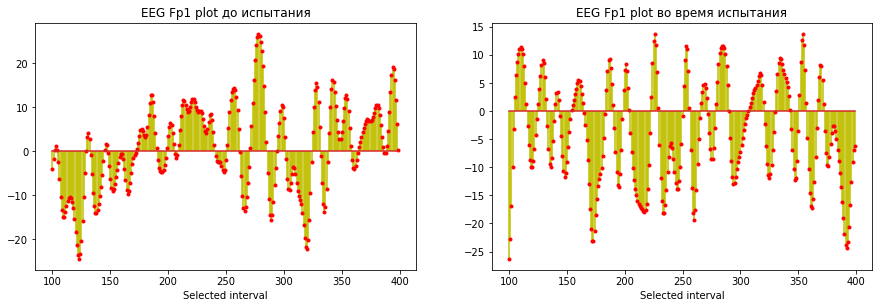

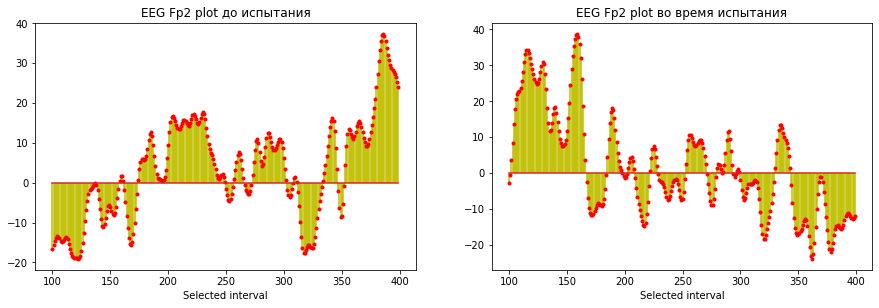

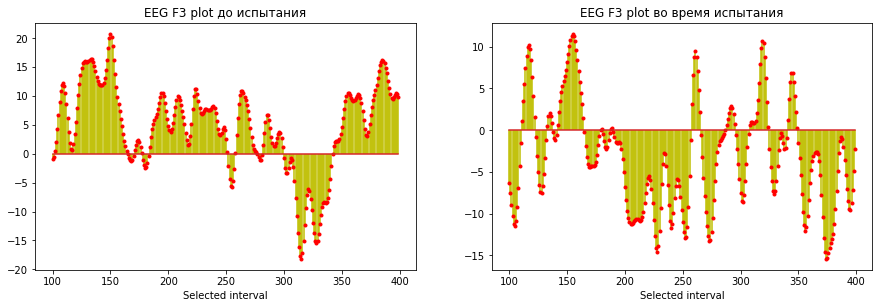

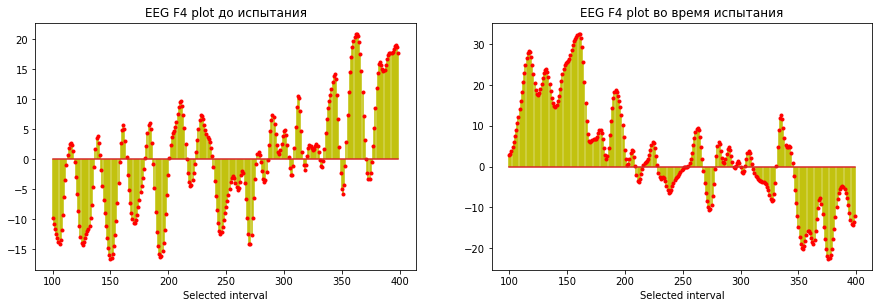

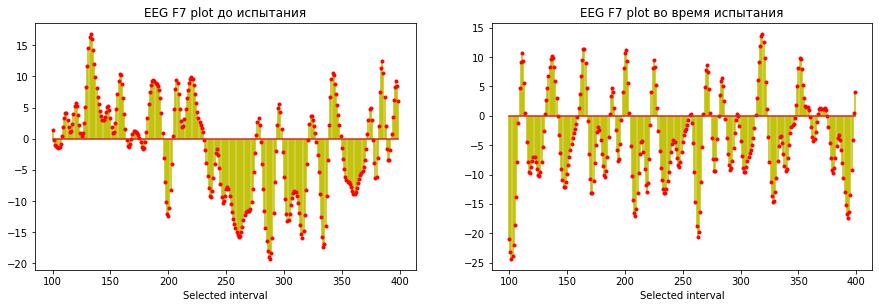

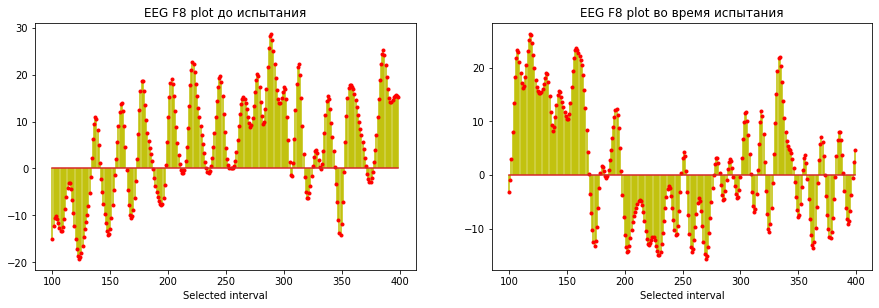

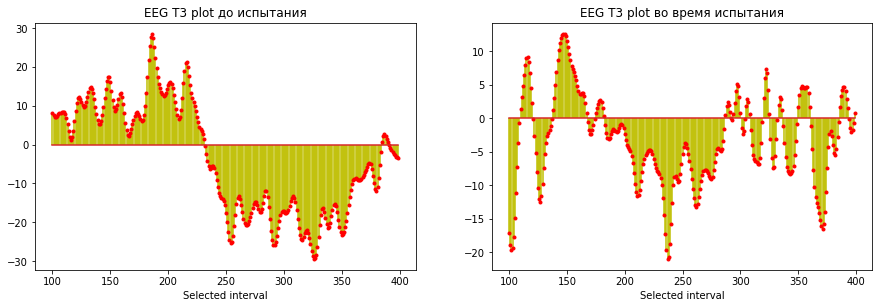

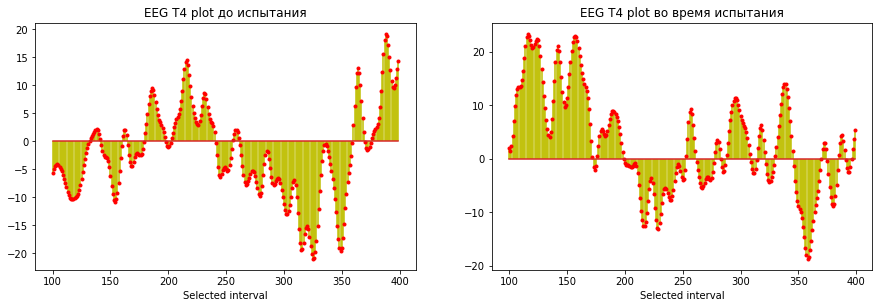

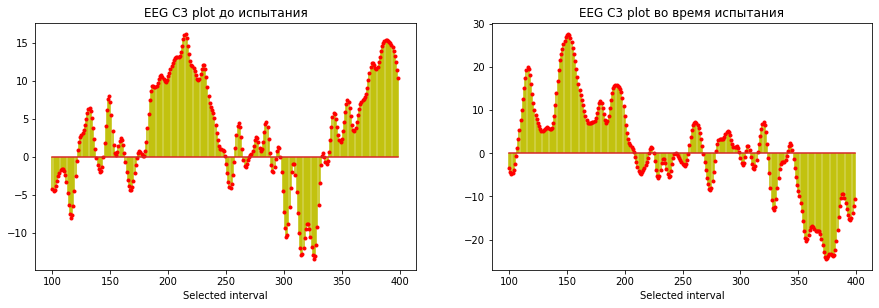

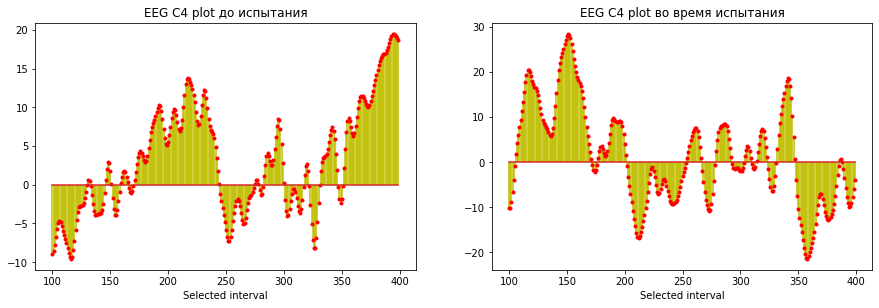

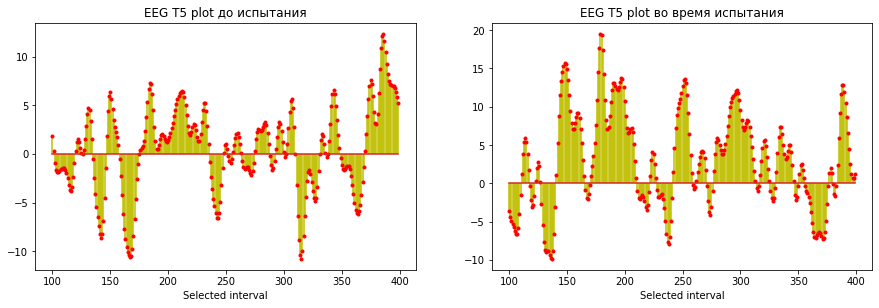

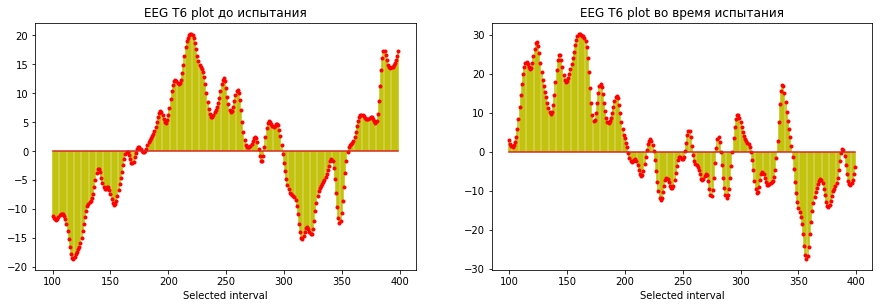

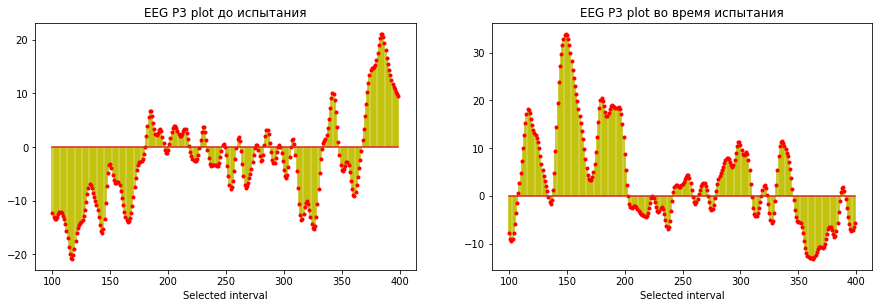

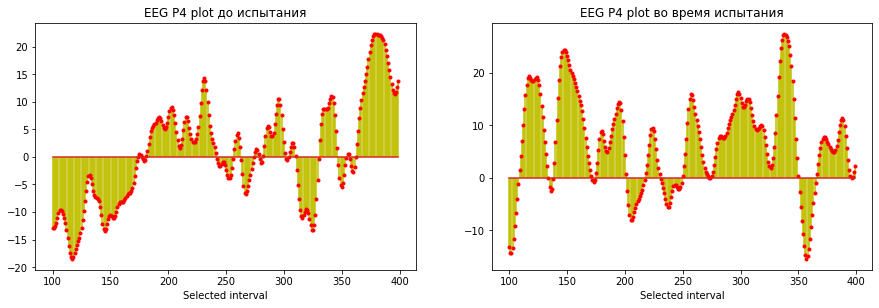

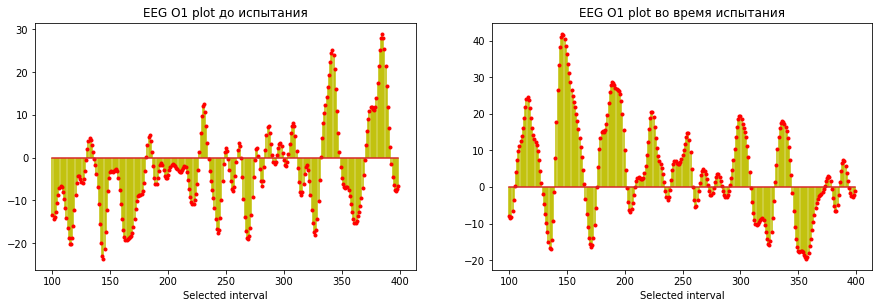

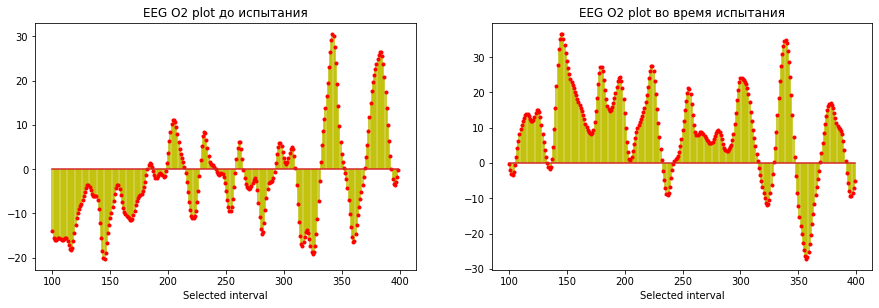

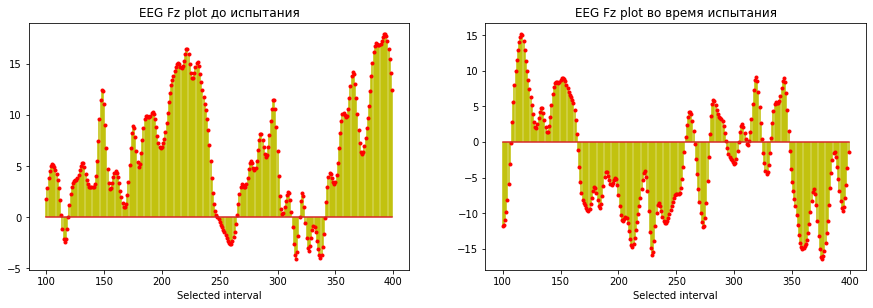

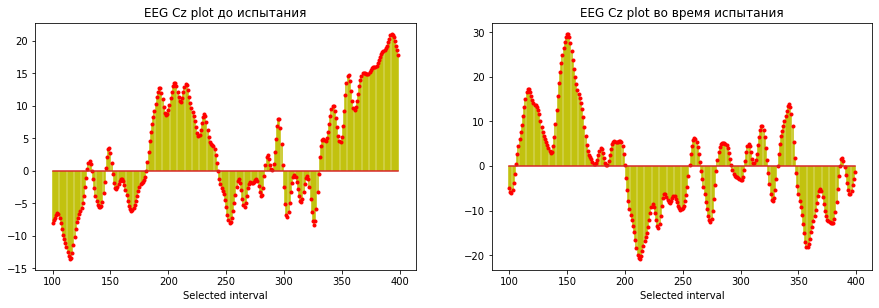

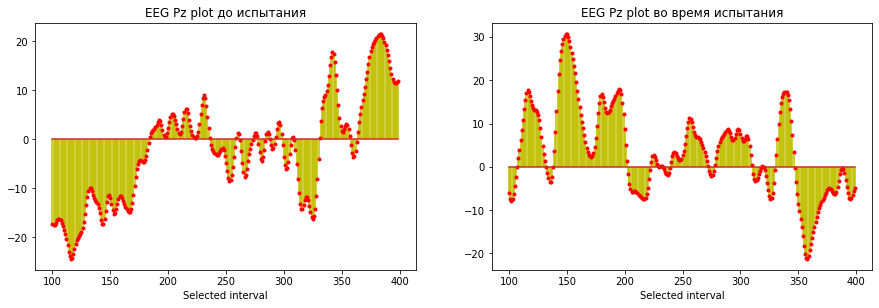

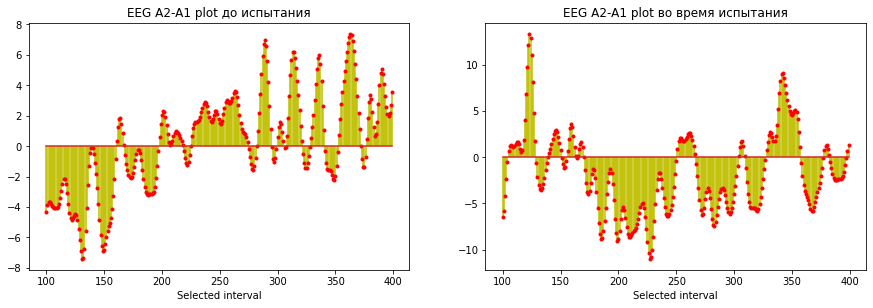

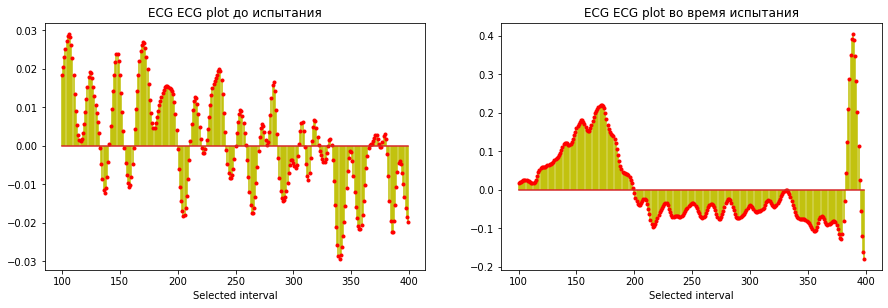

In [ ]:
for i in range(21):
  plt.figure(figsize=(15, 10))

  plt.subplot(221)
  plt.stem(np.arange(100, 400, 1), df1.loc[signal_names1[i]][100:400], '-y', '.r', use_line_collection=True)
  plt.title('{} plot до испытания'.format(signal_names1[i]))
  plt.xlabel('Selected interval')

  plt.subplot(222)
  plt.stem(np.arange(100, 400, 1), df2.loc[signal_names2[i]][100:400], '-y', '.r', use_line_collection=True)
  plt.title('{} plot во время испытания'.format(signal_names2[i]))
  plt.xlabel('Selected interval')

In [ ]:
f_data1 = [np.fft.rfft(data1_[0][i]) for i in range(len(signal1))]
f_data2 = [np.fft.rfft(data2_[0][i]) for i in range(len(signal2))]

freq1 = [np.fft.rfftfreq(len(signal1[i]), 1./500) for i in range(len(signal1))]
freq2 = [np.fft.rfftfreq(len(signal2[i]), 1./500) for i in range(len(signal2))]

spectr1 = [np.absolute(f_data1[i]) for i in range(len(f_data1))]
spectr2 = [np.absolute(f_data2[i]) for i in range(len(f_data2))]

Графики спектральной мощности в диапазоне [0, 50]

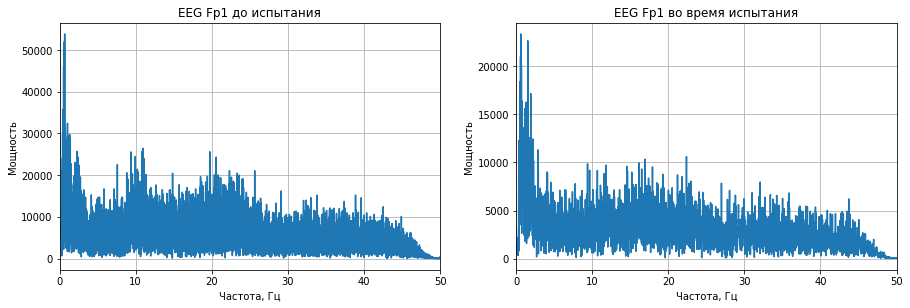

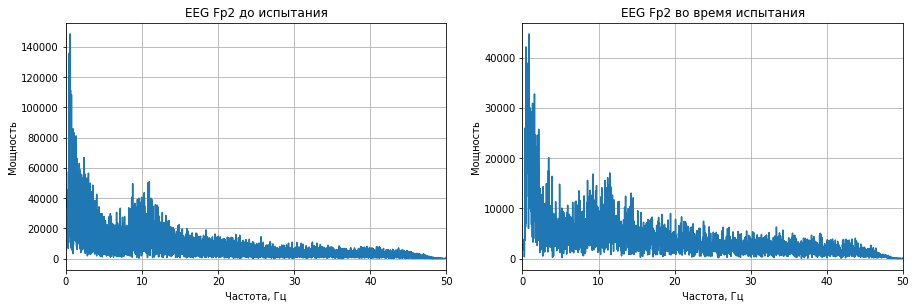

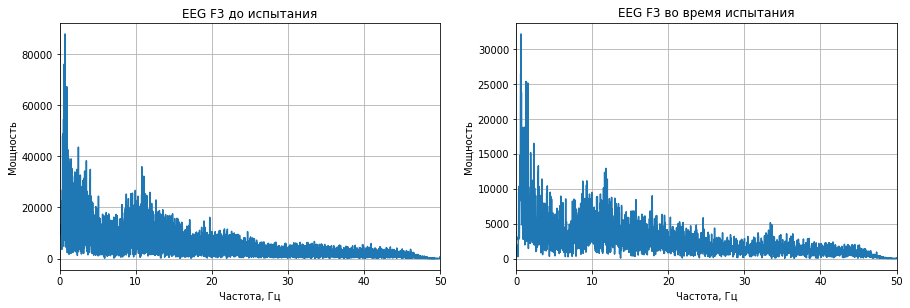

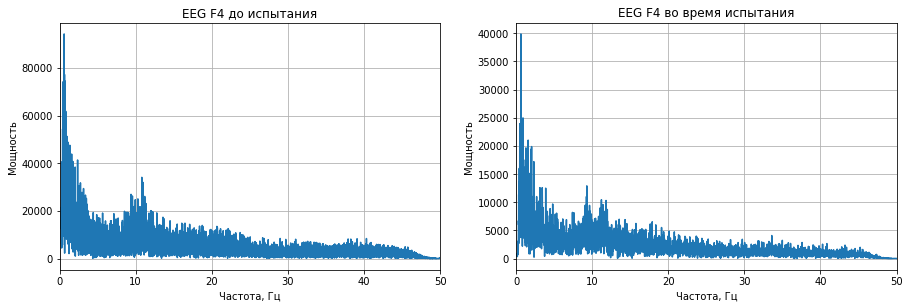

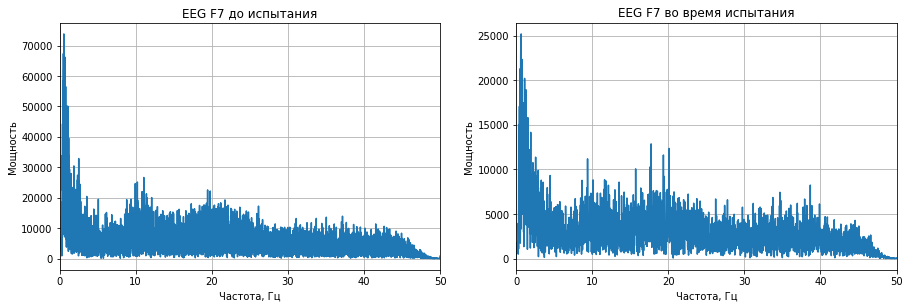

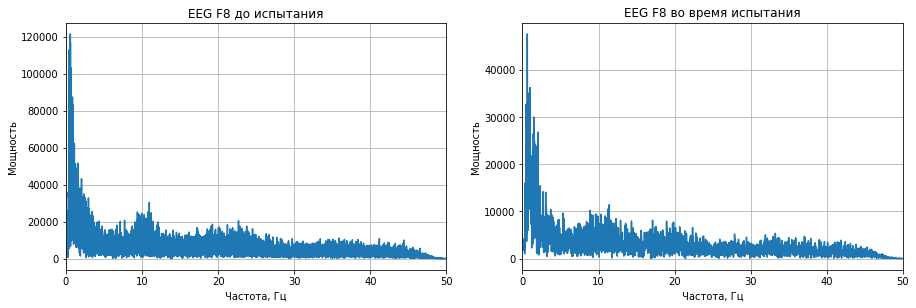

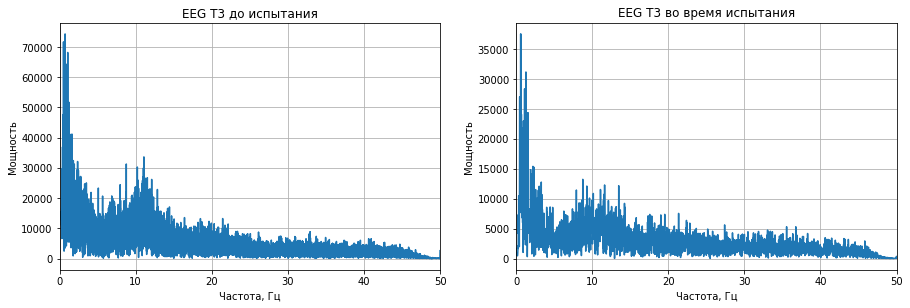

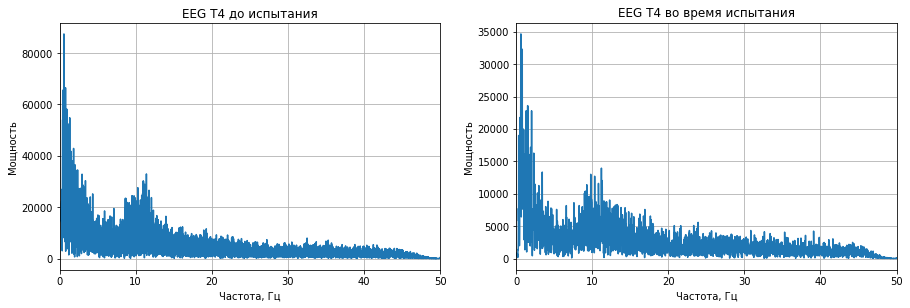

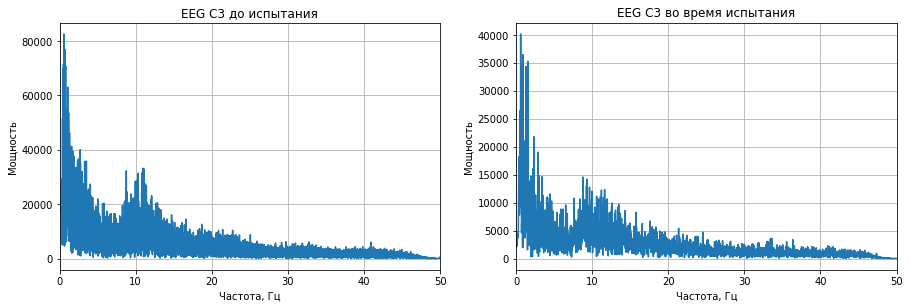

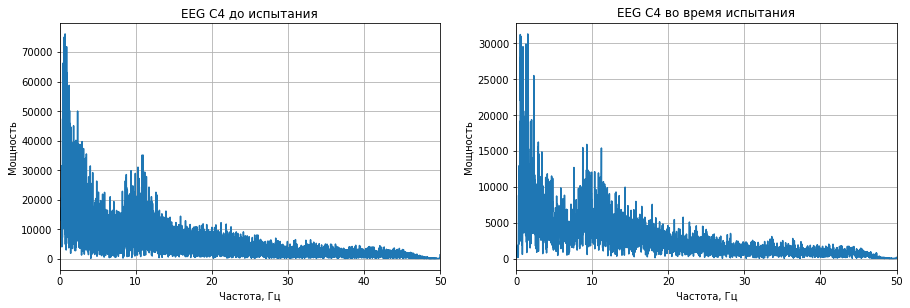

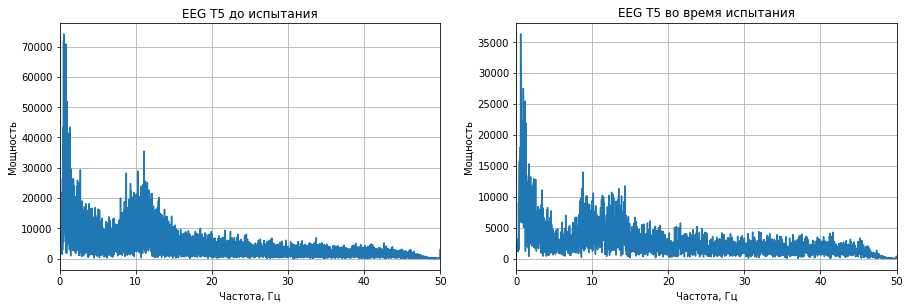

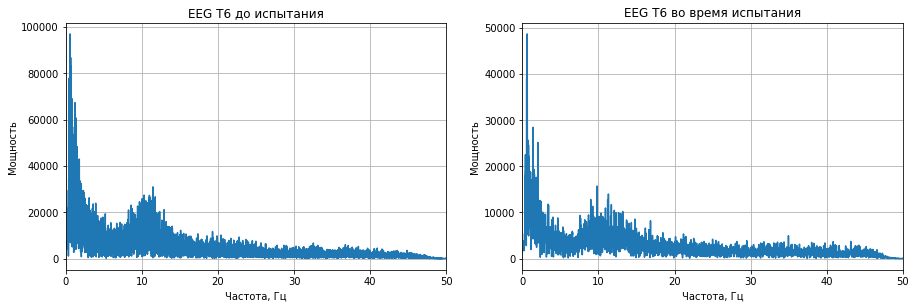

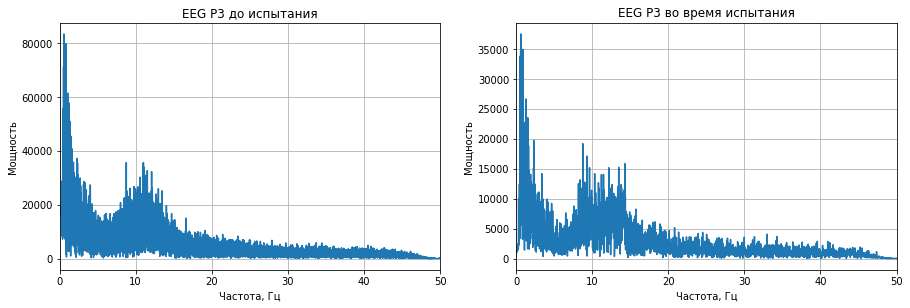

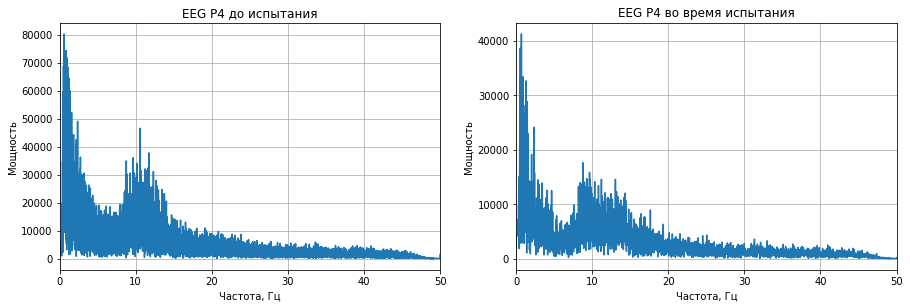

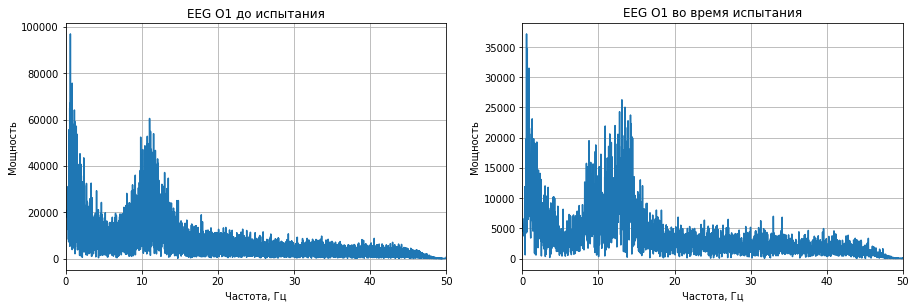

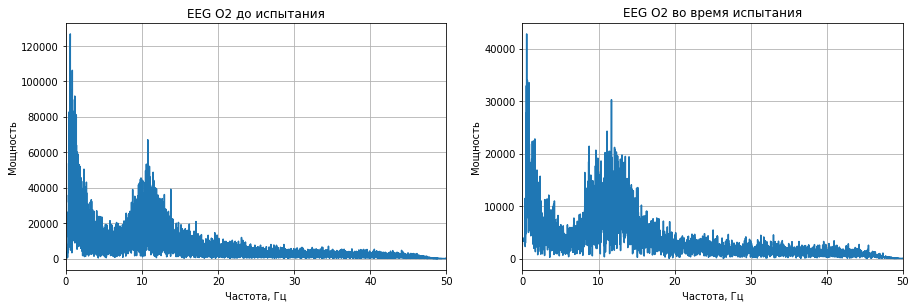

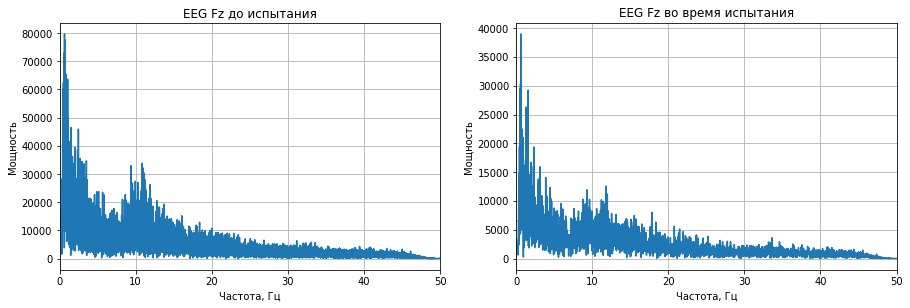

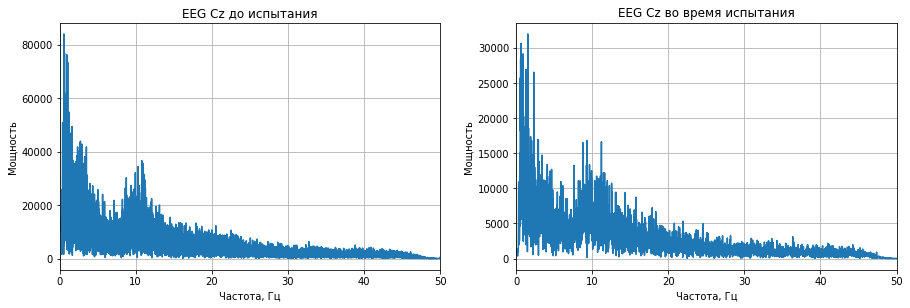

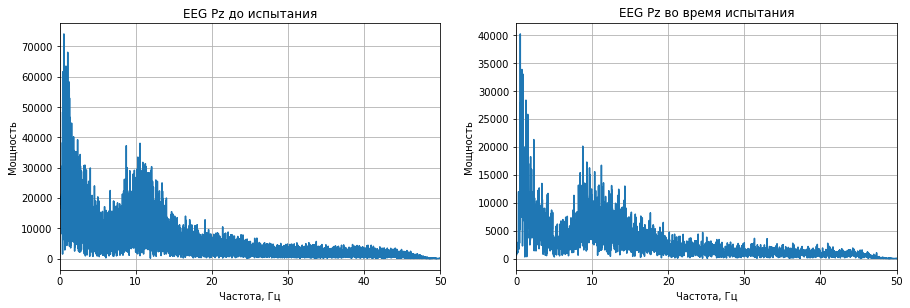

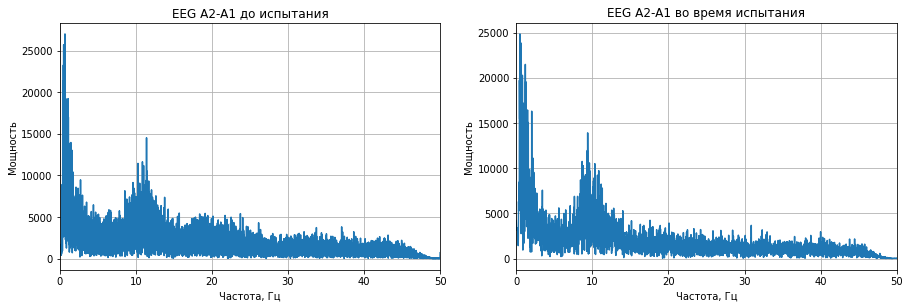

In [ ]:
for i in range(20):
    plt.figure(figsize=(15, 10))

    plt.subplot(221)
    plt.plot(freq1[i], spectr1[i])
    plt.xlim([0, 50])
    plt.grid(True)
    plt.title('{} до испытания'.format(signal_names1[i]))
    plt.xlabel('Частота, Гц')
    plt.ylabel('Мощность')

    plt.subplot(222)
    plt.plot(freq2[i], spectr2[i])
    plt.xlim([0, 50])
    plt.grid(True)
    plt.title('{} во время испытания'.format(signal_names2[i]))
    plt.xlabel('Частота, Гц')
    plt.ylabel('Мощность')

In [ ]:
fspectr1 = spectr1.copy()
fspectr2 = spectr2.copy()

for i in range(20):
  for j in range(len(freq1[i])):
    if not (freq1[i][j] >= 7 and freq1[i][j] <= 40): 
      fspectr1[i][j] = 0
  for j in range(len(freq2[i])):
    if not (freq2[i][j] >= 7 and freq2[i][j] <= 40): 
      fspectr2[i][j] = 0
    

Графики спектральной мощности после фильтрации

Только для Альфа и Бета частот на диапазоне [7, 40]

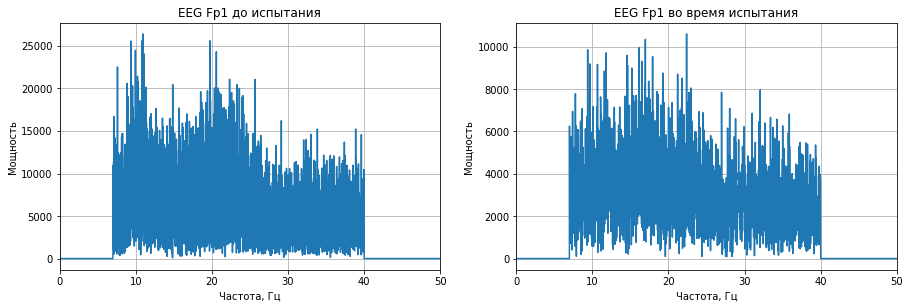

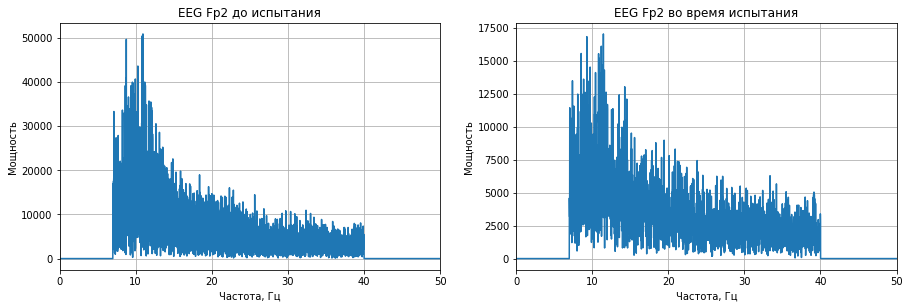

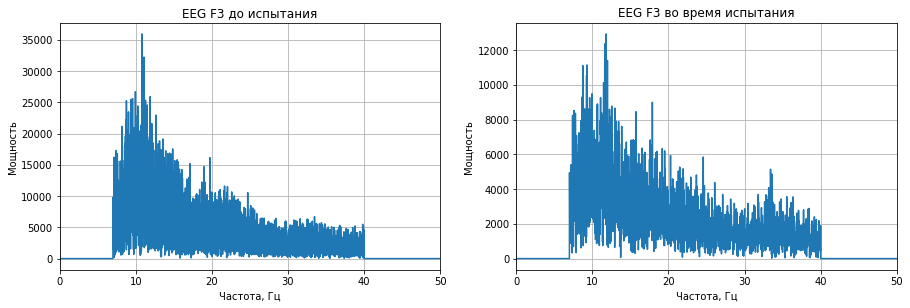

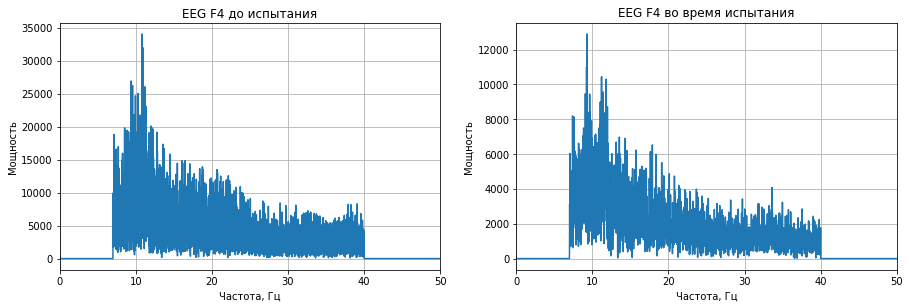

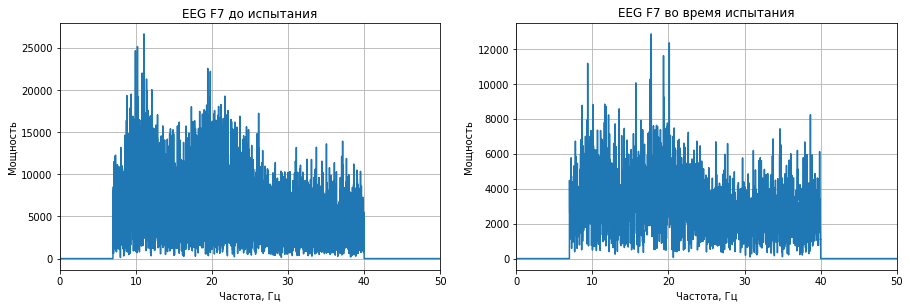

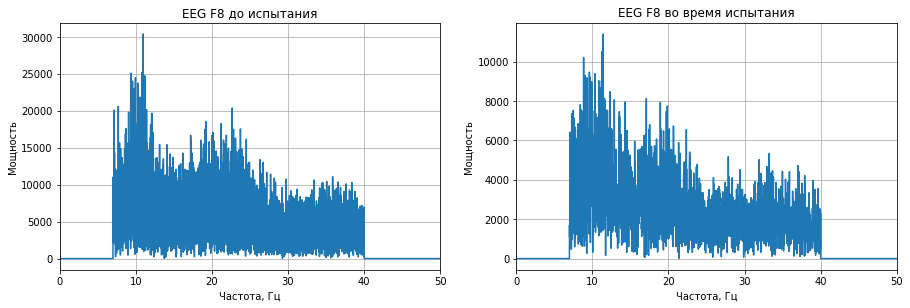

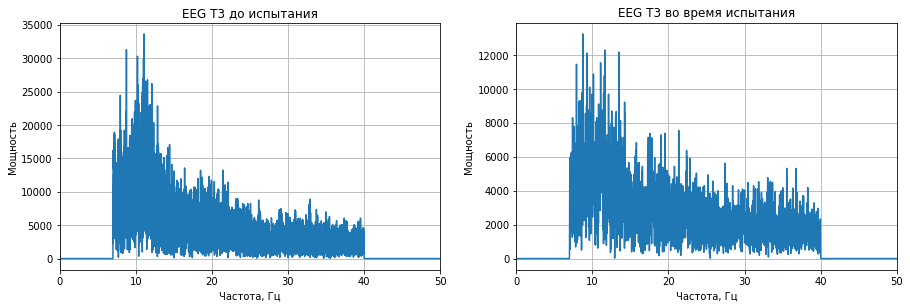

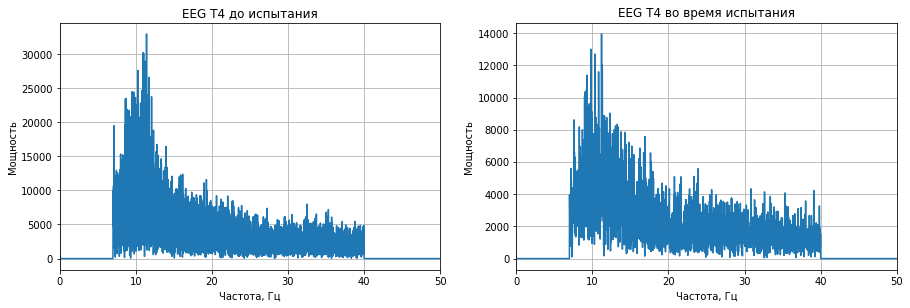

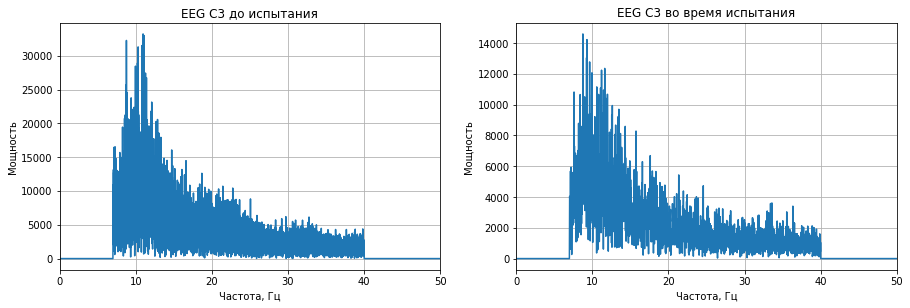

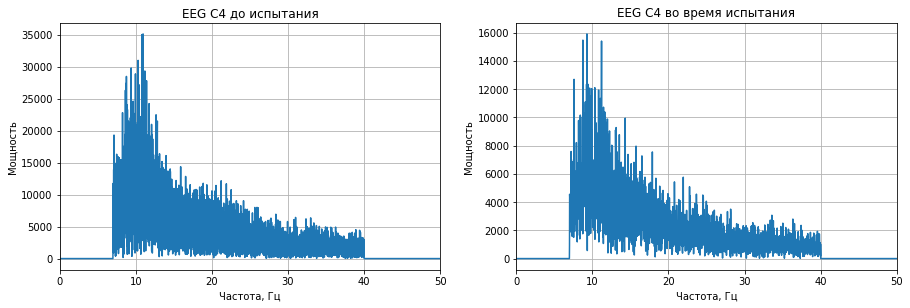

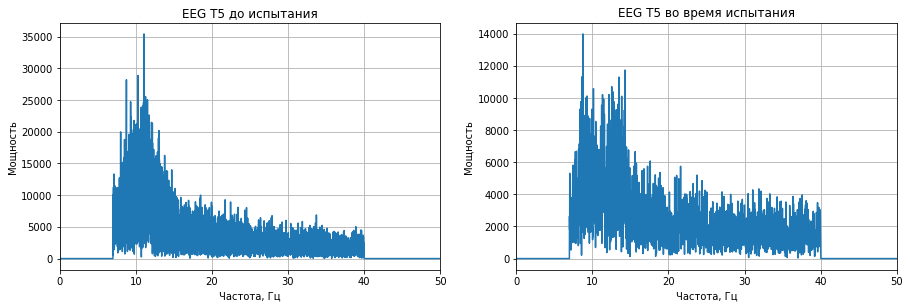

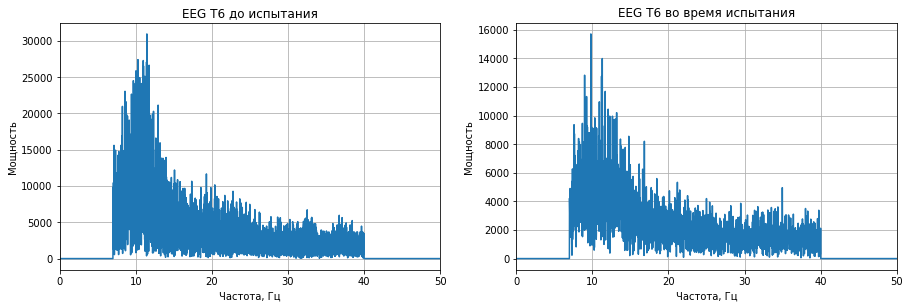

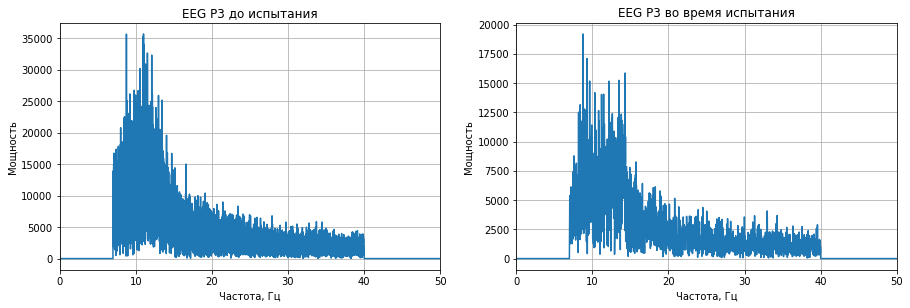

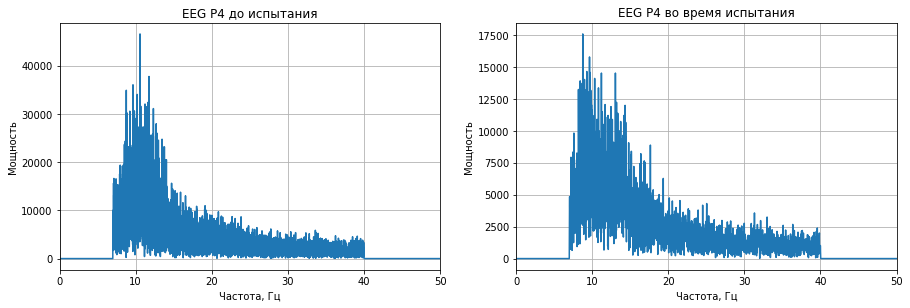

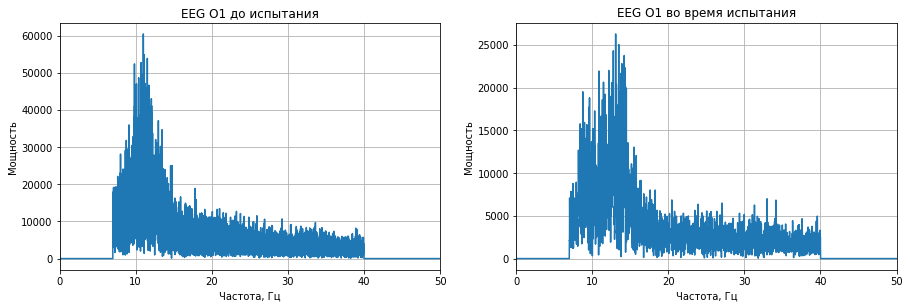

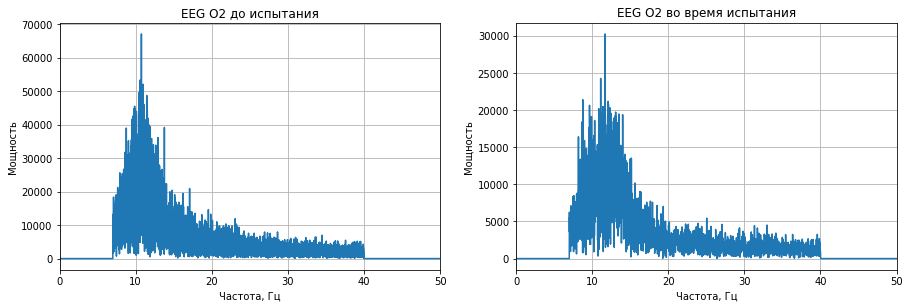

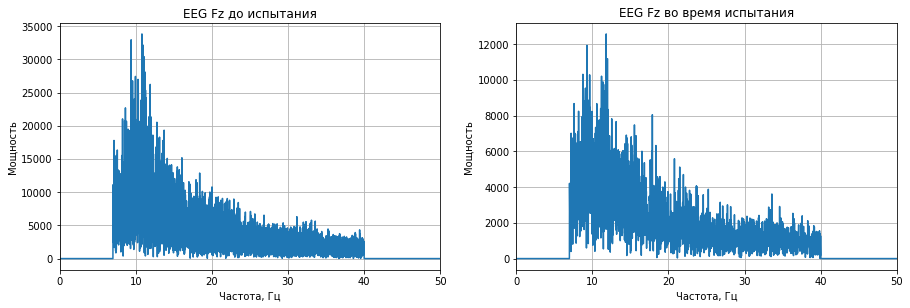

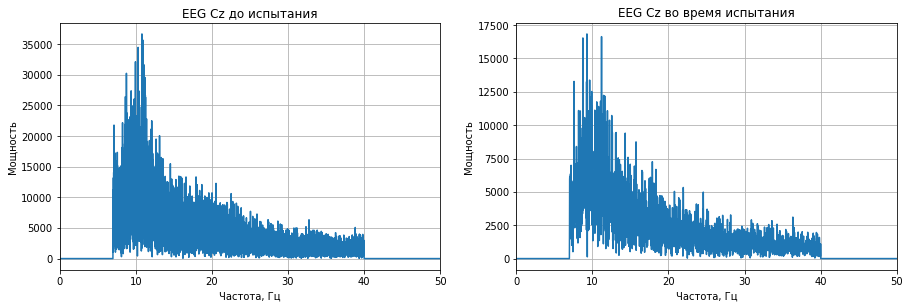

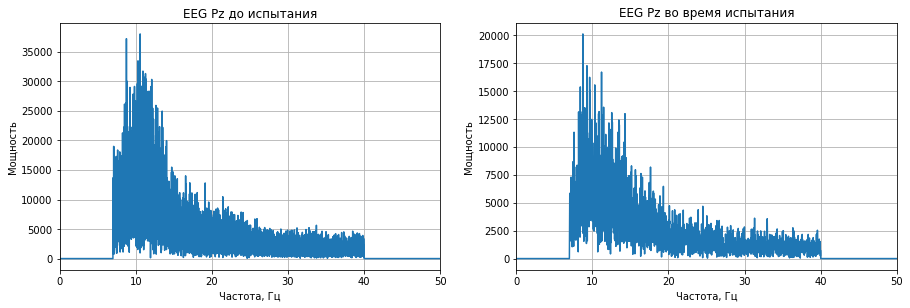

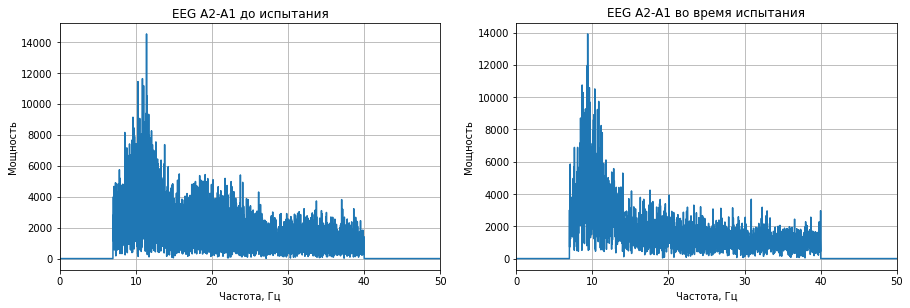

In [ ]:
for i in range(20):
    plt.figure(figsize=(15, 10))

    plt.subplot(221)
    plt.plot(freq1[i], fspectr1[i])
    plt.xlim([0, 50])
    plt.grid(True)
    plt.title('{} до испытания'.format(signal_names1[i]))
    plt.xlabel('Частота, Гц')
    plt.ylabel('Мощность')

    plt.subplot(222)
    plt.plot(freq2[i], fspectr2[i])
    plt.xlim([0, 50])
    plt.grid(True)
    plt.title('{} во время испытания'.format(signal_names2[i]))
    plt.xlabel('Частота, Гц')
    plt.ylabel('Мощность')

Обратное Фурье-преобразование для данных без лишних частот

In [ ]:
ff_data1 = [sp.fft.irfft(fspectr1[i]) for i in range(20)]
ff_data2 = [sp.fft.irfft(fspectr2[i]) for i in range(20)]

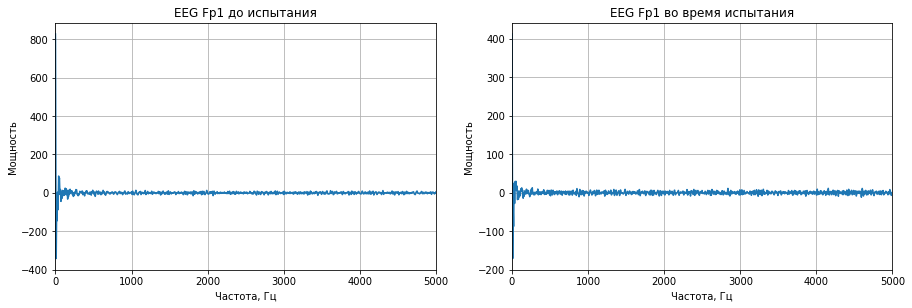

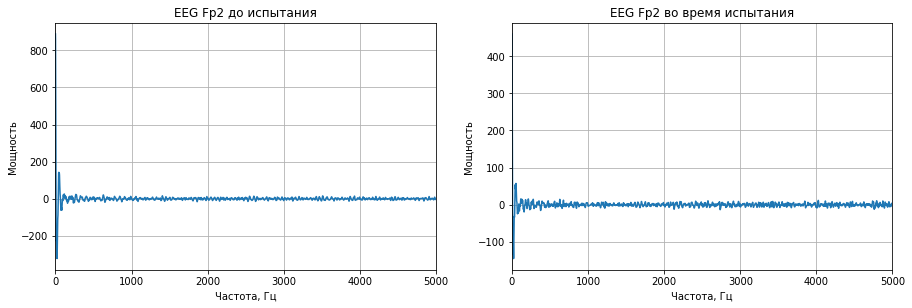

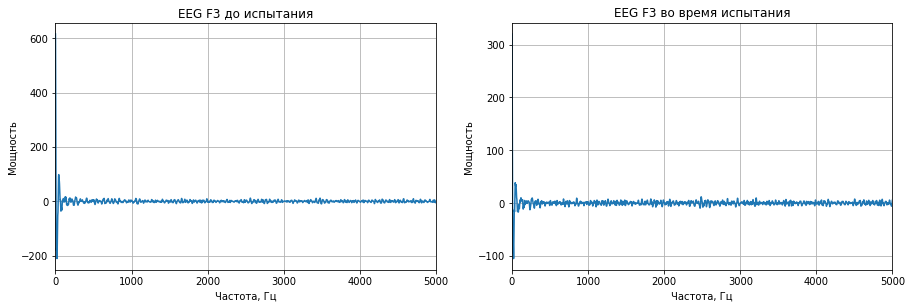

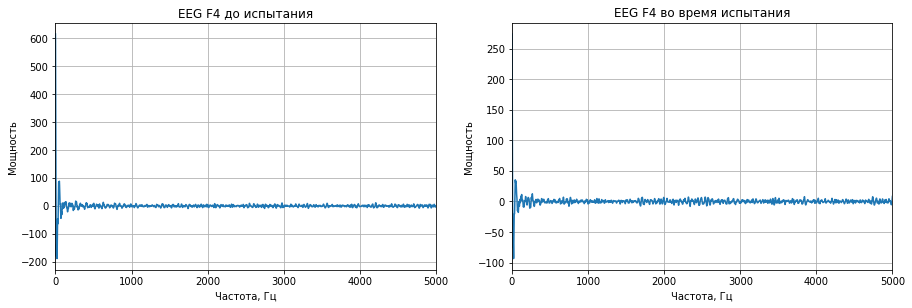

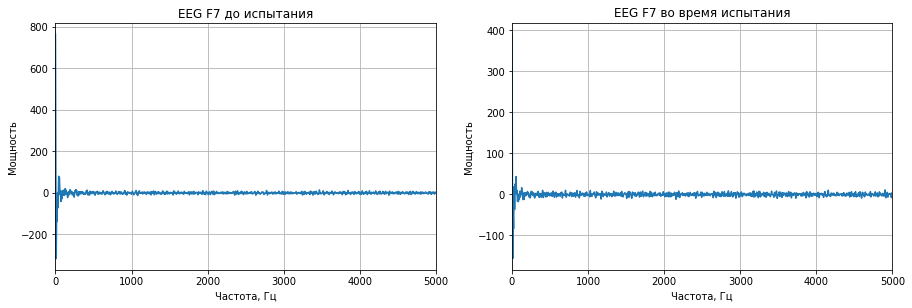

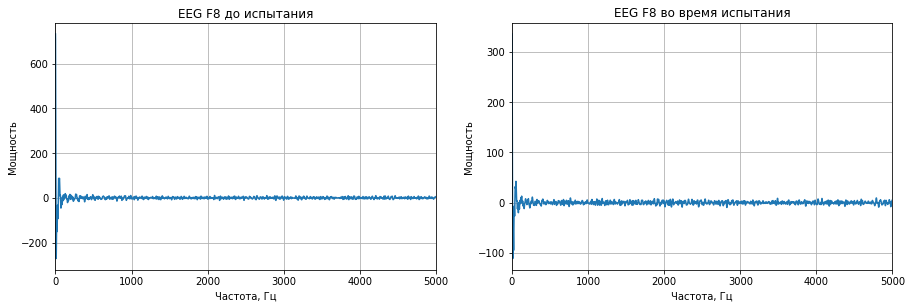

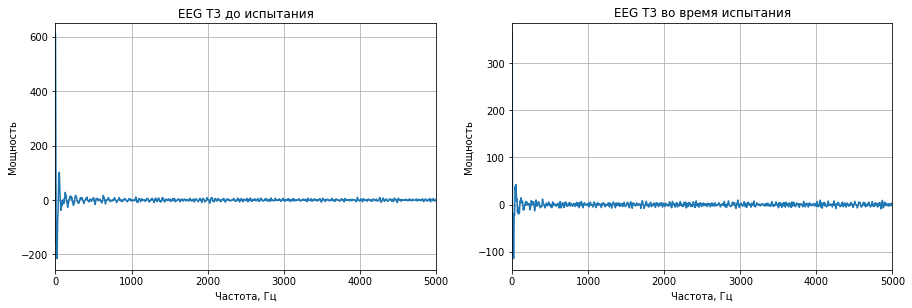

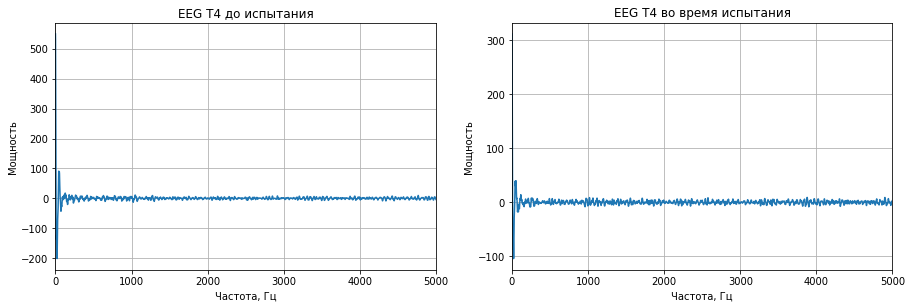

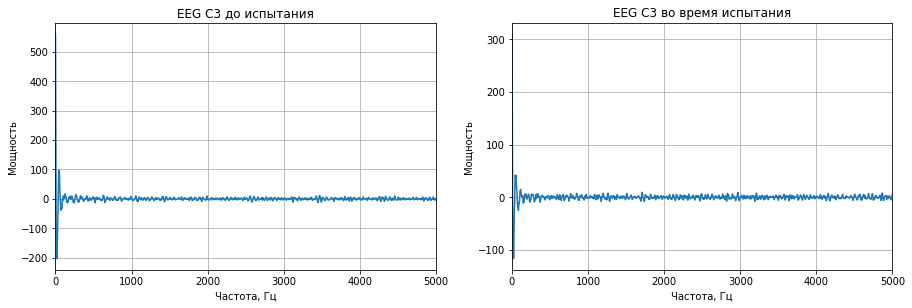

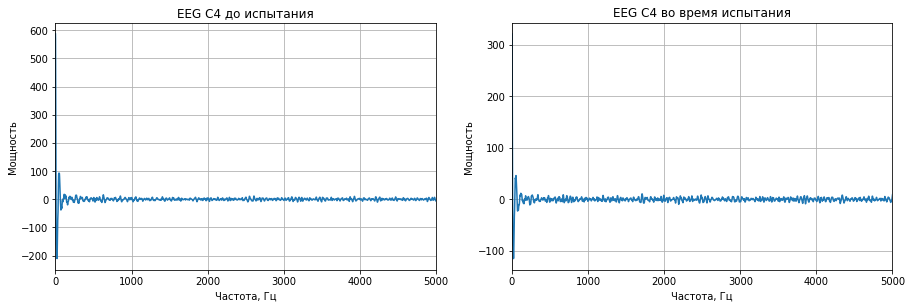

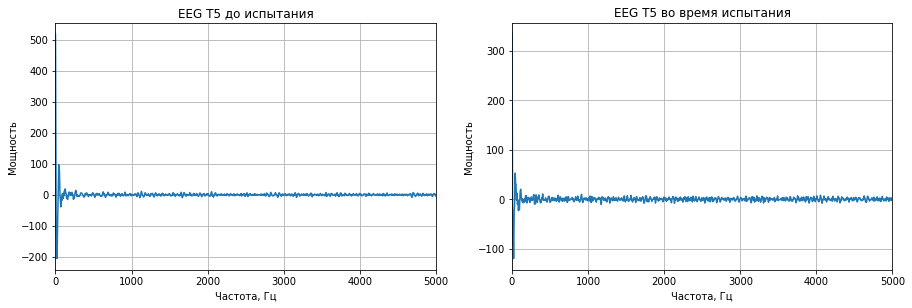

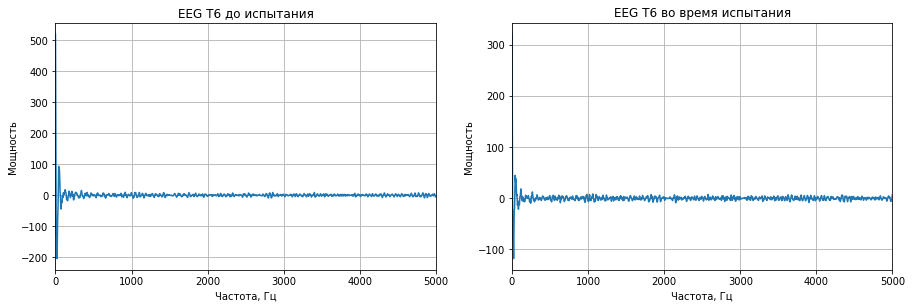

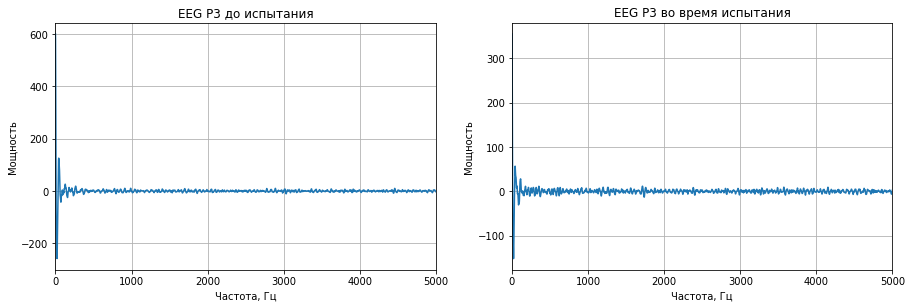

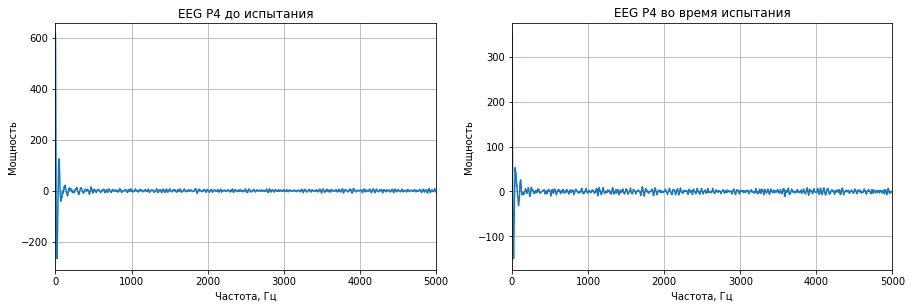

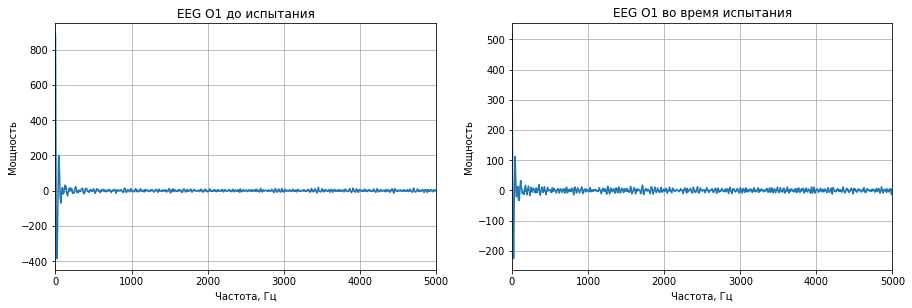

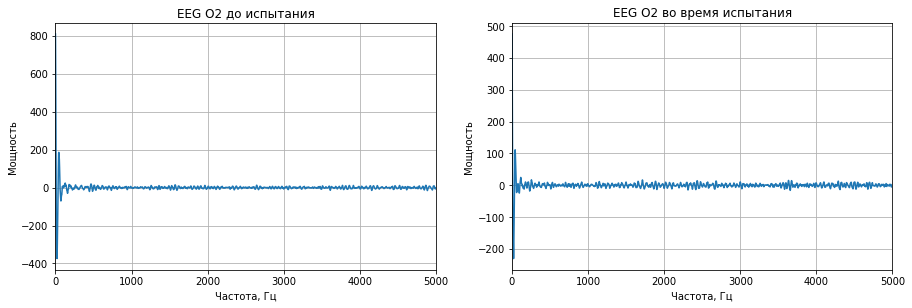

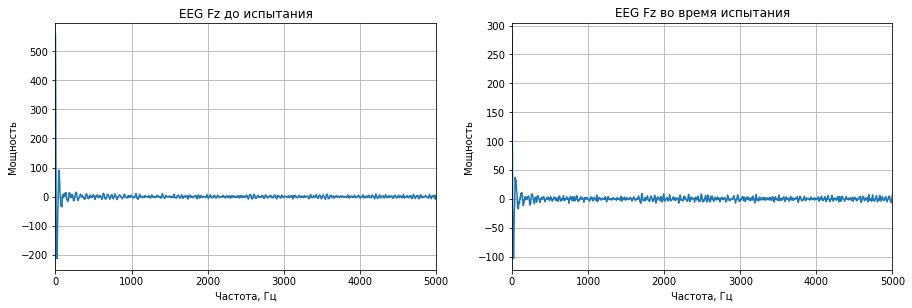

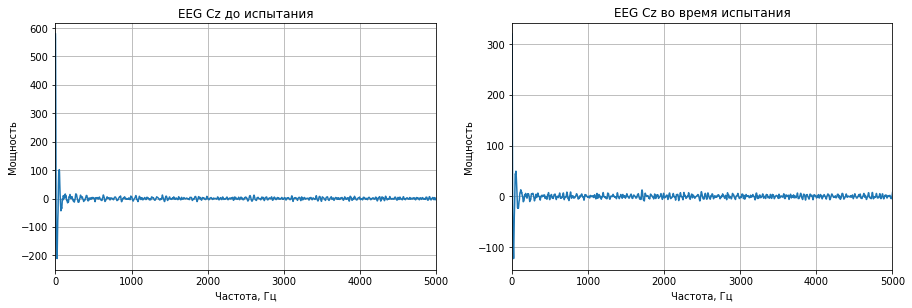

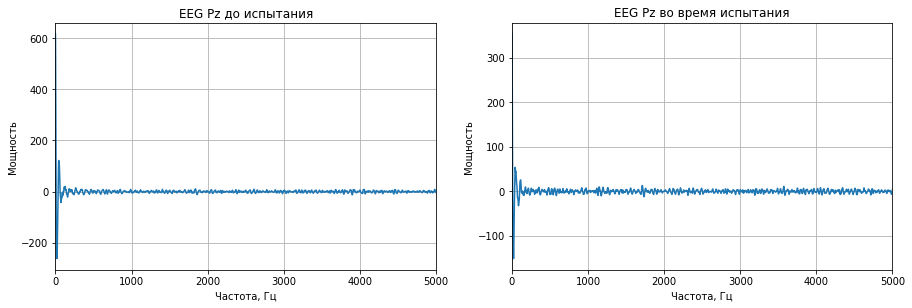

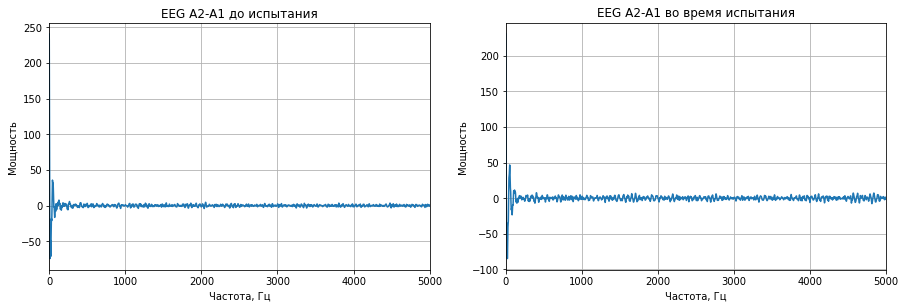

In [ ]:
for i in range(20):
    plt.figure(figsize=(15, 10))

    plt.subplot(221)
    plt.plot(ff_data1[i])
    plt.xlim([0, 5000])
    plt.grid(True)
    plt.title('{} до испытания'.format(signal_names1[i]))
    plt.xlabel('Частота, Гц')
    plt.ylabel('Мощность')

    plt.subplot(222)
    plt.plot(ff_data2[i])
    plt.xlim([0, 5000])
    plt.grid(True)
    plt.title('{} во время испытания'.format(signal_names2[i]))
    plt.xlabel('Частота, Гц')
    plt.ylabel('Мощность')